In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 10.8MB/s 
     |████████████████████████████████| 194kB 21.1MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.1MB 23.2MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from IPython.display import display,HTML

In [3]:
import numpy as py
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<img alt="Diagram of the ULMFiT process" width="450" src="https://github.com/fastai/fastbook/blob/master/images/att_00027.png?raw=1">

# Preprocessing

In [69]:
from fastai.text.all import *

In [70]:
path = "/content/amazon_reviews_us_Camera_v1_00.tsv"

In [71]:
df = pd.read_csv(path,delimiter='\t',error_bad_lines=False)


b'Skipping line 85458: expected 15 fields, saw 22\nSkipping line 91161: expected 15 fields, saw 22\n'
b'Skipping line 166123: expected 15 fields, saw 22\n'
b'Skipping line 225458: expected 15 fields, saw 22\nSkipping line 229936: expected 15 fields, saw 22\nSkipping line 259297: expected 15 fields, saw 22\n'
b'Skipping line 284728: expected 15 fields, saw 22\nSkipping line 286334: expected 15 fields, saw 22\nSkipping line 293400: expected 15 fields, saw 22\nSkipping line 294415: expected 15 fields, saw 22\nSkipping line 308150: expected 15 fields, saw 22\nSkipping line 315022: expected 15 fields, saw 22\nSkipping line 315730: expected 15 fields, saw 22\nSkipping line 316071: expected 15 fields, saw 22\nSkipping line 326729: expected 15 fields, saw 22\n'
b'Skipping line 329101: expected 15 fields, saw 22\nSkipping line 333077: expected 15 fields, saw 22\nSkipping line 377031: expected 15 fields, saw 22\nSkipping line 389496: expected 15 fields, saw 22\nSkipping line 390486: expected 15 

In [72]:
%%capture
df = df.head(180000)
df.head()

In [73]:
df.shape

(180000, 15)

In [74]:
df = df[['star_rating','review_body']]
df.head()

,star_rating,review_body
0,5,ok
1,5,"Perfect, even sturdier than the original!"
2,2,"If the words, &#34;Cheap Chinese Junk&#34; come to your mind when you see this, then congratulate yourself. You're pretty close. One of the most important features of a 'security camera&#34; is the ability to detect motion and record, especially when running on battery and limited storage space. I tested the motion detect on this camera in a few different environments so far (i.e. low light, indoors, outdoors, etc..) and all I got was a SD card full of video triggers. All the testing was done with the low motion sensitivity setting. I can't even imagine what the high one would be.<br ..."
3,5,"Exactly what I wanted and expected. Perfect for hiking or carrying when you are going someplace you MAY need a quick closeup. I bought it to leave in my glovebox so I always have it with me. I've used it a few times already and couldn't be happier with it. For the price, it's definitely worth picking up if you are looking for a good monocular."
4,5,"I will look past the fact that they tricked me into believing this is a Canon product. It's not by Canon. It's some generic brand that i've never heard of. HOWEVER, it works surprisingly well! The sound quality is actually really good. The wire is actually super long and is perfect for indoor shooting."


In [75]:
df = df.dropna()

In [76]:
df['star_rating'] = df['star_rating'].astype(int)

In [77]:
print ((df['star_rating'] == 5).sum())
print ((df['star_rating'] == 4).sum())
print ((df['star_rating'] == 3).sum())
print ((df['star_rating'] == 2).sum())
print ((df['star_rating'] == 1).sum())

112489
28207
13202
8584
17484


In [78]:
df['star_rating']= py.where(df['star_rating']>=4,1,0) ##asi un poco mas balanceado 
df.head()

,star_rating,review_body
0,1,ok
1,1,"Perfect, even sturdier than the original!"
2,0,"If the words, &#34;Cheap Chinese Junk&#34; come to your mind when you see this, then congratulate yourself. You're pretty close. One of the most important features of a 'security camera&#34; is the ability to detect motion and record, especially when running on battery and limited storage space. I tested the motion detect on this camera in a few different environments so far (i.e. low light, indoors, outdoors, etc..) and all I got was a SD card full of video triggers. All the testing was done with the low motion sensitivity setting. I can't even imagine what the high one would be.<br ..."
3,1,"Exactly what I wanted and expected. Perfect for hiking or carrying when you are going someplace you MAY need a quick closeup. I bought it to leave in my glovebox so I always have it with me. I've used it a few times already and couldn't be happier with it. For the price, it's definitely worth picking up if you are looking for a good monocular."
4,1,"I will look past the fact that they tricked me into believing this is a Canon product. It's not by Canon. It's some generic brand that i've never heard of. HOWEVER, it works surprisingly well! The sound quality is actually really good. The wire is actually super long and is perfect for indoor shooting."


In [79]:
print ((df['star_rating'] == 1).sum())
print ((df['star_rating'] == 0).sum())

140696
39270


In [80]:
final_true= df[df['star_rating']==1][:45000]
final_false = df[df['star_rating']==0][:39000]
df = final_true.append(final_false)
df = df.sample(frac = 1, random_state = 1)
df = df.reset_index(drop=True)
len(df)

84000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


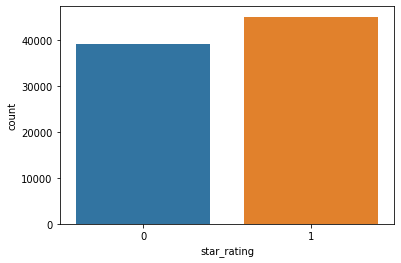

In [81]:
sns.countplot(df['star_rating'])

In [82]:
#df = df[0:200]
df['index'] = df.index
df.head()

,star_rating,review_body,index
0,1,"very good camera, installed and work better than the others, have purchsed more.",0
1,1,"The AR-X100 is a solid product and sturdier than what I thought...I assumed it was going to be a cheaply made,flimsy easy to break Adapter but was pleasantly surprised when I received it... Purchased this because I eventually want to add filter(s) to my new camera...No problems or issues with this so far...Very useful item!",1
2,0,Cable connection was loose so I had to buy a replacement,2
3,1,Works great. Item is exactly as stated.,3
4,0,"Ordered one R-Tech bullet and one dome, both outdoor. This bullet's night vision didn't work, so I ordered another for replacement. The new camera ordered has no image other than a slow flash of red or green, completely DOA. These are the last R-Tech's, and I'm just hoping the dome continues to work.",4


In [83]:
df['is_valid']= py.where(df['index'] < 60500 ,'False','True') #divido en train valid pero a ojo 
d = {'True': True, 'False': False}
df['is_valid']= df['is_valid'].map(d)
df.dtypes

star_rating     int64
review_body    object
index           int64
is_valid         bool
dtype: object

In [84]:
df

,star_rating,review_body,index,is_valid
0,1,"very good camera, installed and work better than the others, have purchsed more.",0,False
1,1,"The AR-X100 is a solid product and sturdier than what I thought...I assumed it was going to be a cheaply made,flimsy easy to break Adapter but was pleasantly surprised when I received it... Purchased this because I eventually want to add filter(s) to my new camera...No problems or issues with this so far...Very useful item!",1,False
2,0,Cable connection was loose so I had to buy a replacement,2,False
3,1,Works great. Item is exactly as stated.,3,False
4,0,"Ordered one R-Tech bullet and one dome, both outdoor. This bullet's night vision didn't work, so I ordered another for replacement. The new camera ordered has no image other than a slow flash of red or green, completely DOA. These are the last R-Tech's, and I'm just hoping the dome continues to work.",4,False
...,...,...,...,...
83995,1,Has been a great pack for my SLR! It has kept it safe on hikes and during travel!,83995,True
83996,0,"Made pretty nice! It was missing the screw to tighten the block onto the rails, contacted seller and never heard back from them, would give 4 stars if I didn't have to buy a screw that doesn't look as nice.",83996,True
83997,0,No good,83997,True
83998,1,GoPro adaptor for aux mic. I have a ton of these. All good.,83998,True


# Tokenization and numericalization (solo para ver como funciona) 

WORD TOKENIZATION with fastai

In [42]:
# Let's take the first review:
txt = df['review_body'].iloc[0]
txt

'It is kinda expensive for only 10 but it came really fast'

In [43]:
spacy = WordTokenizer()
toks = first(spacy([txt]))
print(coll_repr(toks, 30))

(#12) ['It','is','kinda','expensive','for','only','10','but','it','came','really','fast']


In [44]:
tkn = Tokenizer(spacy)
print(coll_repr(tkn(txt), 31))

(#14) ['xxbos','xxmaj','it','is','kinda','expensive','for','only','10','but','it','came','really','fast']


In [45]:
txts = df['review_body'].iloc[0:200]
txts

0                                                                                                                                                                                                                                                                                                                                   It is kinda expensive for only 10 but it came really fast
1                                                                                                                                                                                   Just got one and it works as advertised. Easy to use. Easy to set up. Very helpful as we travel a lot and will be able to keep an eye on our home. Might add a way you can also connect through a laptop.
2                                                                                                                                                                                                                                           

In [46]:
toks200 = txts[:200].map(tkn)
toks200.head()

0                                                                                                                                                                                                                                                                                                                                                                           [xxbos, xxmaj, it, is, kinda, expensive, for, only, 10, but, it, came, really, fast]
1                                                                                                                                                     [xxbos, xxmaj, just, got, one, and, it, works, as, advertised, ., xxmaj, easy, to, use, ., xxmaj, easy, to, set, up, ., xxmaj, very, helpful, as, we, travel, a, lot, and, will, be, able, to, keep, an, eye, on, our, home, ., xxmaj, might, add, a, way, you, can, also, connect, through, a, laptop, .]
2                                                                                                     

Numericalize le tenemos que pasar nuestro texto tokenizado

In [47]:
num = Numericalize()
num.setup(toks200)
coll_repr(num.vocab,20)

"(#560) ['xxunk','xxpad','xxbos','xxeos','xxfld','xxrep','xxwrep','xxup','xxmaj','.','the','i',',','and','it','to','a','for','is','this'...]"

In [48]:
nums = num(toks)[:20]; nums

TensorText([  0,  18,   0, 332,  17,  77,   0,  25,  14, 211, 103, 212])

In [49]:
' '.join(num.vocab[o] for o in nums) ## para reconstruir

'xxunk is xxunk expensive for only xxunk but it came really fast'

In [50]:
nums200 = toks200.map(num)

In [51]:
dl = LMDataLoader(nums200)

In [52]:
x,y = first(dl)
x.shape,y.shape

((64, 72), (64, 72))

Dependent variable

In [53]:
' '.join(num.vocab[o] for o in x[0][:20])

'xxbos xxmaj it is xxunk expensive for only xxunk but it came really fast xxbos xxmaj just got one and'

Independent variable ( shifted one word to the right , following word)

In [54]:
' '.join(num.vocab[o] for o in y[0][:20])

'xxmaj it is xxunk expensive for only xxunk but it came really fast xxbos xxmaj just got one and it'

# Train language model of amazon reviews (to put on top of wikipedia lenguage model)

Fastai handles tokenization and numericalization cuando pasamos TextBlock to DataBlock 

In [85]:
#DATA BLOCKS

amazon = DataBlock(blocks=TextBlock.from_df('review_body', is_lm=True),
                    get_x=ColReader('text'),
                    splitter=ColSplitter())

dls_lm = amazon.dataloaders(df, bs=128, seq_len=80)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [86]:
dls_lm.show_batch(max_n=6)

,text,text_
0,"xxbos xxmaj literally bs , pay so much for so little and such bad quality . xxmaj it 's like there 's a horrible filter on every picture . xxmaj do n't waste your time haha xxbos xxmaj exact xxunk the camera ! xxbos xxmaj an excellent pouch to hold filters . xxmaj instead of 4 plastic filter holders you can condense them into one convenient holder . xxbos xxmaj had an xxup xxunk \n xxmaj this is a great","xxmaj literally bs , pay so much for so little and such bad quality . xxmaj it 's like there 's a horrible filter on every picture . xxmaj do n't waste your time haha xxbos xxmaj exact xxunk the camera ! xxbos xxmaj an excellent pouch to hold filters . xxmaj instead of 4 plastic filter holders you can condense them into one convenient holder . xxbos xxmaj had an xxup xxunk \n xxmaj this is a great camera"
1,. xxmaj after messing around with the numerous mounting devices i headed out for a ride . xxmaj though i did not realize that i had it set to record 3 minute sequences the entire trip was nicely recorded . xxmaj watching it was like watching a roller coaster ride . xxmaj stunning ! xxbos these work great on my husbands camera lenses . very compact ! xxbos i have xxmaj pelican cases for a lot of valuable equipment .,xxmaj after messing around with the numerous mounting devices i headed out for a ride . xxmaj though i did not realize that i had it set to record 3 minute sequences the entire trip was nicely recorded . xxmaj watching it was like watching a roller coaster ride . xxmaj stunning ! xxbos these work great on my husbands camera lenses . very compact ! xxbos i have xxmaj pelican cases for a lot of valuable equipment . xxmaj
2,"have not yet used the car charger but the home wall charger does what it needs to do and i am totally satisfied . xxmaj price was right , it charges the xxmaj nikon coolpix camera i picked up on the cheap . xxmaj now i just need a proper xxup usb cable . xxbos xxmaj works very well . i do n't think i would need anything larger . xxbos xxmaj junk xxbos xxmaj this camera is pretty great","not yet used the car charger but the home wall charger does what it needs to do and i am totally satisfied . xxmaj price was right , it charges the xxmaj nikon coolpix camera i picked up on the cheap . xxmaj now i just need a proper xxup usb cable . xxbos xxmaj works very well . i do n't think i would need anything larger . xxbos xxmaj junk xxbos xxmaj this camera is pretty great and"
3,xxbos xxmaj great product and xxmaj service . \n xxmaj walter in support was very helpful in setting up my remote access xxbos xxmaj mic quality is the exact same as stock .. xxmaj non direction does n't really even work . xxbos xxmaj it did not work . xxbos xxmaj the backdoor floaty door i had from my original gopro housing does not fit the same on this . xxmaj let 's a xxunk xxrep 5 l amount of,xxmaj great product and xxmaj service . \n xxmaj walter in support was very helpful in setting up my remote access xxbos xxmaj mic quality is the exact same as stock .. xxmaj non direction does n't really even work . xxbos xxmaj it did not work . xxbos xxmaj the backdoor floaty door i had from my original gopro housing does not fit the same on this . xxmaj let 's a xxunk xxrep 5 l amount of water
4,"as xxmaj gorilla xxmaj glass ( found on the iphone ) . xxmaj for that reason , i bought this xxup x113 as my lightweight travel camera . xxmaj while the t had much better color and white balance , it just did not seem durable enough for extended trips in my backpack . \n\n i feel this little xxup x113 is durable enough for the backpack . \n\n i have owned a number of similar products from xxmaj nikon","xxmaj gorilla xxmaj glass ( found on the iphone ) . xxmaj for that reason , i bought this xxup x113 as my lightweight travel camera . xxmaj while the t had much better color and white balance , it just did not seem durable enough for extended trips in my backpack . \n\n i feel this little xxup x113 is durable enough for the backp

In [87]:
learn = language_model_learner(
    dls_lm, AWD_LSTM, drop_mult=0.3,            ### awd_lstm rnn que ya introduce dropout y mas (regularizacion)
    metrics=[accuracy, Perplexity()]).to_fp16()

In [88]:
learn.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.970117,3.774528,0.286847,43.576927,10:58


In [89]:
learn.save('1epoch')

Path('models/1epoch.pth')

In [90]:
learn = learn.load('1epoch')

In [91]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.741557,3.657372,0.301171,38.759331,12:52
1,3.650637,3.577344,0.311169,35.778400,12:45
2,3.529994,3.523911,0.317399,33.916809,12:55
3,3.388268,3.489221,0.321978,32.760429,12:54
4,3.288152,3.482124,0.324350,32.528751,12:46
5,3.177183,3.489088,0.324898,32.756069,12:47
6,3.062344,3.509408,0.324273,33.428463,12:48
7,2.948074,3.527866,0.323853,34.051220,12:54
8,2.910212,3.541364,0.322554,34.513969,12:47
9,2.869443,3.551282,0.322099,34.857967,12:56


In [92]:
learn.save_encoder('finetuned')

# Creating classifier DataLoaders, training complete classifier

In [93]:
dls_clas = DataBlock(blocks=(TextBlock.from_df('review_body', seq_len=72, vocab=dls_lm.vocab), CategoryBlock),
                      get_x=ColReader('text'),
                      get_y=ColReader('star_rating'),
                      splitter=ColSplitter()).dataloaders(df, bs=128, seq_len=72)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [94]:
dls_clas.show_batch(max_n=5)

,text,category
0,"xxbos xxmaj hi , \n\n xxmaj this is my review of the product listed on xxmaj amazon as : \n\n easyacc xxmaj selfie xxmaj stick xxunk xxmaj pro 3-in-1 xxmaj self - portrait xxmaj monopod xxmaj extendable xxmaj wireless xxmaj bluetooth xxmaj selfie xxmaj stick with built - in xxmaj bluetooth xxmaj remote xxmaj shutter xxmaj with xxmaj adjustable xxmaj phone xxmaj holder for iphone 6 , iphone 6 xxmaj plus , iphone 5 5s 5c , xxmaj android \n\n i received this product today and have evaluated it for an hour to give a detailed review . xxmaj included are a set of photos that i captured showing the product up close in case anyone is interested . \n\n xxup unboxing xxup and xxup observation : \n\n xxmaj when i first received this sample , i found the box had taken a beating during shipment from xxmaj amazon .",1
1,"xxbos xxmaj although with hundreds of other reviews , mine will go un noticed , but i still give good reviews any ways . i bought the camera 9 months ago , struggled to understand how to get from one option to another . xxmaj the very very small xxup lcd screen in the front is not easy to read , as it tells you what mode you are in . xxmaj if in the water proof case , using the back display is out of the question as it is un - useable . xxmaj after using it on / off for over 5 months , i had enough , sat down and spend a few hours just playing with all the options , making changes and learning . xxmaj even being a tech person it was a trick . xxmaj now i flew through it flawlessly . xxmaj",1
2,"xxbos xxup dji has done it . xxmaj i 've been eyeballing quadcopters since the early phantoms and finally took the plunge with the xxup dji xxmaj phantom 3 xxmaj pro . xxmaj it 's easy to fly , and doing so has become a favorite activity for my son ( age 10 ) and xxup i. xxmaj he flies it like a pro , with marked improvement each time he pilots it . i created a playlist on youtube with instructional and review videos , and we watched them before our first flight ( * * see xxmaj below ) . xxmaj we are having a lot of fun spending time together , learning and looking at the world from such unique perspectives . \n\n xxmaj the aircraft itself is extremely well built , though it is evident upon inspection that the weak part of this setup ( and",1
3,"xxbos i wanted to love this spotting scope ( the xxmaj celestron xxunk 100 mm xxmaj ultima xxmaj zoom xxmaj spotting xxmaj scope with 45-degree - angle viewer ) . i tried using it three times in different environments and situations , but i ultimately decided to return it . xxmaj here 's why : \n\n xxmaj my first complaint really has nothing to do with the scope itself but with the variation in viewfinders . xxmaj i 'll throw this out there for anyone looking for an actual spotting scope to use target shooting : xxmaj decide whether you truly want the 45-degree angled viewer or if you should get the straight viewer . i should have got the straight viewer , and did n't realize this until i was at the xxunk and having to stand up every few shots to get above the scope . xxmaj again",0
4,"xxbos xxup update 10 / 21 / 2015 : xxmaj i 've had the xxmaj canary about four months now . xxmaj during this time period , it has crashed twice and xxmaj i 've had to go through the entire process of setting everything up again . xxmaj this would not be such a large problem , but i was n't notified that it went out and where 's its located , i ca n't see the color changes on the bottom of the device . \n xxmaj canary has also changed my plan . xxmaj since xxmaj i 've had this , all my videos had been stored for a week- it has now changed to only 12 hours for the free plan . xxmaj this xxunk me greatly . i loved having multiple days on my timeline because it 's convenient for me . xxmaj now the",0


In [95]:
learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy).to_fp16()

In [96]:
learn = learn.load_encoder('finetuned')

In [97]:
learn.fit_one_cycle(1, 2e-2)  ## start training at a low learning rate, gradually increase it for the first section of training, and then grad‐ ually decrease it again for the last section of training:

epoch,train_loss,valid_loss,accuracy,time
0,0.442367,0.286324,0.881447,04:05


In [98]:
learn.freeze_to(-2)

In [99]:
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.289274,0.250421,0.898000,04:41


In [100]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.261187,0.239647,0.909362,07:03


In [101]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3)) 

epoch,train_loss,valid_loss,accuracy,time
0,0.222685,0.241755,0.910340,08:38
1,0.209392,0.246604,0.911319,08:38


Conseguimos casi un 92% de accuracy